# Make embeddings

# 2D Embeddings

## View

Data needs to be in the format: `[{"x": 3, "y": 5}, {"x": 4, "y": 2}, ...]`

In [37]:
# Make some sample embeddings data
data = [
    {"x": 3, "y": 5}, 
    {"x": 4, "y": 2}, 
    {"x": 1, "y": 1}, 
    {"x": 2, "y": 3}, 
    {"x": 5, "y": 4}
]

from cosmograph import cosmo

t = cosmo(
    links=[], 
    nodes=[{'id': '1', 'x': 300, 'y': 300}, {'id': '2', 'x': 600, 'y': 600}], 
    disable_simulation=True
)

# cosmo(data, disable_simulation=True)

<IPython.core.display.Javascript object>

In [20]:
print(t.data)


        <div id="canvas_02"></div>

        <script>
            
        globalThis.CreateContainerAndCosmographById("canvas_02", "400px", "100%")
    
            AddGraphContainerToDivById("canvas_02")
            globalThis.cosmos__set_data("canvas_02", [], [{'id': '1', 'x': 300, 'y': 300}, {'id': '2', 'x': 600, 'y': 600}], {"disableSimulation": true})
        </script>
    


In [43]:
t

In [49]:
# from cosmograph import cosmo
# from cosmograph.tests import TestData
# from jy import add_js_funcs
from cosmograph.util import js_files, js_dir_path

# print(js_files["interface"])

# js_dir_path

list(js_files)

['interface',
 'mk_new_container_and_graph',
 'mk_containers_and_graphs',
 'mk_new_canvas_and_cosmos_instance',
 'scrap',
 'cosmograph-iife-bundle',
 'js-py-bridge',
 'mk_api_methods',
 'mk_canvas_and_graphs_containers',
 'cosmos-iife-bundle']

In [54]:
from jy.js_parse import dflt_py_to_js_value_trans
import jy.js_parse
jy.js_parse.__file__

'/Users/thorwhalen/Dropbox/py/proj/i/jy/jy/js_parse.py'

In [56]:
from cosmograph.util import *

dir(u)

['AttrContainer',
 'DFLT_CANVAS',
 'Files',
 'HTML',
 'IpythonObjects',
 'Javascript',
 'JsFiles',
 'Param',
 'Pipe',
 'Sig',
 'TextFiles',
 '__builtins__',
 '__cached__',
 '__cosmos_html',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_assert_camel_and_snake_sanity',
 '_canvas_ids',
 '_config_dflts',
 '_cosmo_call_sig',
 '_cosmo_sig',
 '_cosmos_config_info',
 '_cosmos_html',
 '_default_of_py_name',
 '_description_of_py_name',
 '_download_and_save_config_info',
 '_ensure_cosmo_data',
 '_ensure_links_and_nodes',
 '_files',
 '_js_mk_api_methods',
 '_js_mk_containers_and_graphs',
 '_js_mk_new_container_and_graph',
 '_ko_names_kinds',
 '_mk_py_cosmos_arg_description',
 '_nodes_from_links',
 '_one_time_setup',
 '_original_cosmo_sig',
 '_postprocess',
 '_prop_of_py_name',
 '_py_cosmos_call',
 '_raw_cosmos_call',
 '_replace_non_alphanumerics_by_underscore',
 '_tmp_test_of_py_costmos_call',
 'add_attributes',
 'add_ipython_key_completions',
 'add_js_funcs'

# Random graphs

2


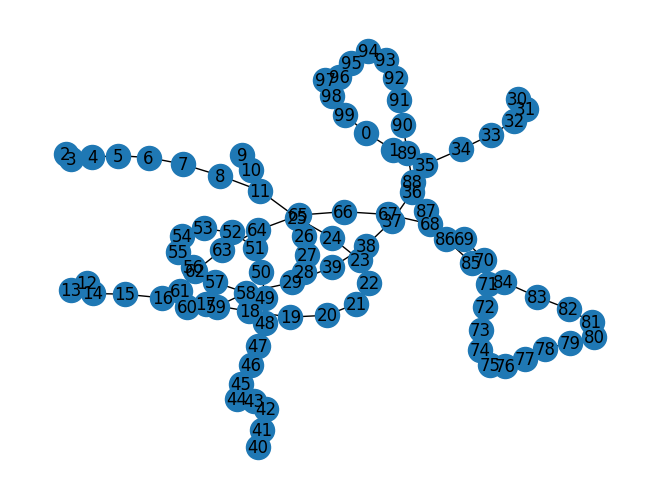

In [36]:
import networkx as nx
import random

import networkx as nx
import random

def generate_random_graph(
        num_nodes, 
        edge_probability=None, 
        *,
        degree_distribution=None,
        rewiring_probability=None, 
        num_edges=None, 
        community_params=None,
        node_attribute_dist=None, 
        edge_weight_dist=None,
        initial_node_connectivity=None, 
        random_seed=None):
    """
    Generate a random graph based on specified parameters.

    Args:
    num_nodes (int): Number of nodes in the graph.
    edge_probability (float, optional): Probability of edge creation (for Erdős–Rényi model).
    degree_distribution (bool, optional): If True, uses a power-law degree distribution (for Barabási–Albert model).
    rewiring_probability (float, optional): Probability of rewiring each edge (for Watts-Strogatz model).
    num_edges (int, optional): Total number of edges in the graph (alternative to edge_probability).
    community_params (dict, optional): Parameters for community structure (number and size).
    node_attribute_dist (list, optional): Distribution of node attributes.
    edge_weight_dist (list, optional): Distribution of edge weights.
    initial_node_connectivity (int, optional): Number of edges for initial node in growth models.
    random_seed (int, optional): Seed for random number generator for reproducibility.

    Returns:
    networkx.Graph: A graph generated based on the provided parameters.

    Example:
    >>> G = generate_random_graph(5, edge_probability=0.5, random_seed=42)
    >>> len(G.nodes()), len(G.edges())
    (5, 4)
    """
    current_state = random.getstate()

    try:

        # Set the random seed for reproducibility
        if random_seed is not None:
            random.seed(random_seed)

        # Create an empty graph
        G = nx.Graph()

        # Choose a graph generation model based on provided parameters
        if degree_distribution:
            # Barabási–Albert model (scale-free network)
            G = nx.barabasi_albert_graph(num_nodes, initial_node_connectivity)
        elif rewiring_probability:
            # Watts-Strogatz model (small-world network)
            G = nx.watts_strogatz_graph(num_nodes, initial_node_connectivity, rewiring_probability)
        elif num_edges is not None:
            # Random graph with fixed number of edges
            G = nx.gnm_random_graph(num_nodes, num_edges)
        else:
            # Erdős–Rényi model (random network)
            G = nx.erdos_renyi_graph(num_nodes, edge_probability)

        # Add community structure if specified
        if community_params:
            # Additional implementation needed for community structure
            pass

        # Add node attributes if specified
        if node_attribute_dist:
            for node in G.nodes():
                G.nodes[node]['attribute'] = random.choice(node_attribute_dist)

        # Add edge weights if specified
        if edge_weight_dist:
            for u, v in G.edges():
                G[u][v]['weight'] = random.choice(edge_weight_dist)

    finally:
        # Restore the previous state of the random number generator, regardless of any exceptions
        random.setstate(current_state)

    return G

# Example usage
graph = generate_random_graph(
    num_nodes=100, 
    edge_probability=0.8, 
    degree_distribution=None,
    rewiring_probability=0.05, 
    num_edges=None, 
    community_params=None, 
    node_attribute_dist=None, 
    edge_weight_dist=None, 
    initial_node_connectivity=2, 
    random_seed=42
)
# You can visualize the graph using networkx drawing methods or export it for analysis
# graph = nx.erdos_renyi_graph(100, 0.1)
nx.draw(graph, with_labels=True)


{2: 90, 1: 5, 3: 5}

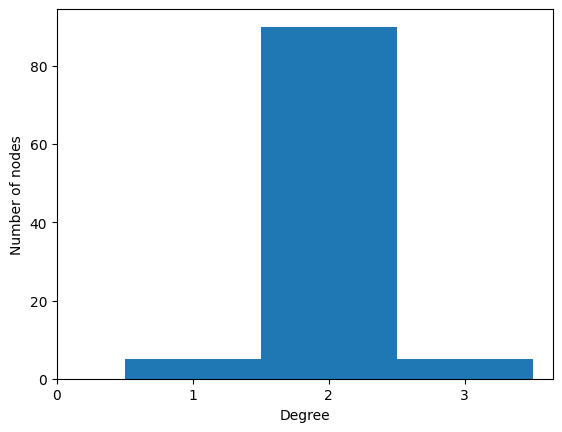

In [25]:

def plot_degree_distribution(graph):
    import matplotlib.pyplot as plt
    import numpy as np
    from collections import Counter

    degrees = [degree for node, degree in graph.degree()]

    # Generate the bins
    bins = np.arange(0.5, max(degrees) + 1.5) 

    # Plot the degree distribution
    plt.hist(degrees, bins=bins, align='mid')
    plt.xticks(np.arange(max(degrees) + 1))
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    return dict(Counter(degrees).most_common())

degrees = plot_degree_distribution(graph)
degrees

# Basics

In [2]:
import pandas as pd

def df_to_links(df, target_col="target", source_col="source"):
    """Convert a dataframe to links (list of ``{target:... source:...}`` dicts"""

    return [
        {'source': str(s), 'target': str(t)} 
        for s, t in zip(df[target_col], df[target_col])
    ]

def csv_url_to_links(csv_url, target_col="target", source_col="source"):
    """Convert a csv url to a links dict"""
    import pandas as pd

    df = pd.read_csv(csv_url)
    return [
        {'source': str(s), 'target': str(t)} 
        for s, t in zip(df[target_col], df[target_col])
    ]
# b = requests.get('https://cosmograph.app/data/Kuu.csv').content
# b = requests.get('https://cosmograph.app/data/pkustk10.csv').content
# df = pd.read_csv(io.BytesIO(b))

csv_url = 'https://cosmograph.app/data/Kuu.csv'
# csv_url = 'https://cosmograph.app/data/pkustk10.csv'

df = pd.read_csv(csv_url)
print(f"{df.shape=}")
df.head()

df.shape=(173651, 3)


source  target             w
0       1       1  2.165541e+00
1       2       1  1.665335e-15
2       3       1 -3.120871e-01
3       4       1  6.938894e-17
4       5       1  1.705763e-02

In [3]:
links = df_to_links(df)
print(f"{len(links)=}, {links[:2]=}, ...")

len(links)=173651, links[:2]=[{'source': '1', 'target': '1'}, {'source': '1', 'target': '1'}], ...


In [4]:
from cosmograph import cosmo
from cosmograph.tests.datagen import TestData, MkTestData


<IPython.core.display.Javascript object>

In [5]:
# data = MkTestData().bipartite(1000, 1000)

# cosmo(links=links)

In [30]:
# cosmo(**data)

# Testing cosmo types

## arg info

In [1]:
from cosmograph import cosmos_config
from cosmograph.util import data_files


<IPython.core.display.Javascript object>

In [2]:
from cosmograph.util import config_info, cosmos_config

In [3]:
cosmos_config[0]

{'Property': 'backgroundColor',
 'Description': 'Canvas background color',
 'Default': '#222222',
 'py_name': 'background_color',
 'type': 'string'}

In [4]:
config_info[0]

{'Property': 'backgroundColor',
 'Description': 'Canvas background color',
 'Default': '#222222',
 'py_name': 'background_color'}

In [7]:
[x for x in config_info if x['name'] == 'renderHighlightedNodeRing']

KeyError: 'name'

In [5]:
t = [x for x in cosmos_config if x['type'] == 'boolean']
t

[{'Property': 'renderHighlightedNodeRing',
  'Description': 'Turns the node highlight on hover on / off',
  'Default': True,
  'py_name': 'render_highlighted_node_ring',
  'type': 'boolean'},
 {'Property': 'renderLinks',
  'Description': 'Turns link rendering on / off',
  'Default': True,
  'py_name': 'render_links',
  'type': 'boolean'},
 {'Property': 'linkArrows',
  'Description': 'Turns link arrow rendering on / off',
  'Default': True,
  'py_name': 'link_arrows',
  'type': 'boolean'},
 {'Property': 'useQuadtree',
  'Description': "Use the classic quadtree algorithm for the Many-Body force. This property will be applied only on component initialization and it can't be changed using the setConfig method. ⚠ The algorithm might not work on some GPUs (e.g. Nvidia) and on Windows (unless you disable ANGLE in the browser settings).",
  'Default': False,
  'py_name': 'use_quadtree',
  'type': 'boolean'},
 {'Property': 'showFPSMonitor',
  'Description': 'Show WebGL performance monitor',
  '

In [ ]:
from cosmograph.util import cosmo
cosmo()


## cosmo types

In [33]:
from cosmograph import cosmo, mini_dot_to_graph_jdict

<IPython.core.display.Javascript object>

In [21]:
six_path = mini_dot_to_graph_jdict("""
        1 -> 2
        2 -> 3
        3 -> 4
        4 -> 5
        5 -> 6
    """)

In [22]:
# cosmo(links=six_path['links'])
# cosmo(links=six_path['links'], node_color='red', node_size_scale=20, background_color='#ccc')

In [23]:
from cosmograph import cosmos_config
from cosmograph.util import _py_cosmos_call

In [24]:
cosmos_config[:1]

[{'Property': 'backgroundColor',
  'Description': 'Canvas background color',
  'Default': '#222222',
  'py_name': 'background_color',
  'type': 'string'}]

### 🙋‍♀️ How to work with nested config parameters?

In [6]:
_py_cosmos_call(simulation_gravity=2)

"canvas=None, config={'simulation.gravity': 2}"

For JS it should be:
```js
{'simulation': {'gravity': 2}}
```

### 💁‍♀️ All types of config parameters

#### Wolf-level types:
```json
"type": "boolean" ❌
"type": "string" ✅
"type": "number" ✅
"type": "number[]" ✅
"type": "number | string" ✅
```

In [13]:
# _py_cosmos_call(links=six_path['links'], link_arrows=False)

In [34]:
# "type": "boolean" ❌
cosmo(links=six_path['links'], link_arrows=True, render_links=False)

In [8]:
# "type": "string" ✅
# cosmo(links=six_path['links'], node_color='deeppink')

In [9]:
# "type": "number" ✅
# cosmo(links=six_path['links'], node_size_scale=10)

In [10]:
# "type": "number[]" ✅
# cosmo(links=six_path['links'], link_visibility_distance_range=[1, 200])

In [11]:
# "type": "number | string" ✅
# cosmo(links=six_path['links'], random_seed=111)
# cosmo(links=six_path['links'], random_seed='abc')

#### Demon-level types:
```json
"type": "NumericAccessor<N>" ✅ (❌)
"type": "ColorAccessor<N>" ✅ (❌)
```

The type `NumericAccessor<N>` is one of the following: `number` or access by one of the Node/Link keys.

The type `ColorAccessor<N>` is one of the following: `string` or `[number, number, number, number]` or access by one of the Node/Link keys.

As a first step, I suggest simplifying the complexity to Wolf-level and using only `number`, `string` and `[number, number, number, number]` for them.

In [1]:
# "type": "ColorAccessor<N>" ✅
# cosmo(links=six_path['links'], node_color=[127, 0, 127, 0.2])

In [2]:
# "type": "ColorAccessor<N>" ❌
# cosmo(links=six_path['links'], node_color=(⁉️)INLINE_FUNCTION_ACCESSOR(⁉️))

#### God-level types:
```json
"type": "() => void" ❌
"type": "(alpha?: number) => void" ❌
"type": "(clickedNode: N | undefined, index: number | undefined, nodePosition: [number, number] | undefined, event: MouseEvent) => void" ❌
"type": "(hoveredNode: N | undefined, index: number | undefined, nodePosition: [number, number] | undefined, event: MouseEvent) => void" ❌
"type": "(hoveredNode: N, index: number, nodePosition: [number, number], event: MouseEvent | D3ZoomEvent<HTMLCanvasElement, undefined> | undefined) => void" ❌
"type": "(event: MouseEvent | D3ZoomEvent<HTMLCanvasElement, undefined> | undefined) => void" ❌
"type": "(e: D3ZoomEvent<HTMLCanvasElement, undefined>, userDriven: boolean) => void" ❌
```
I also suggest not implementing these callback types as a first step. But to learn how JS/Python communication works.

## Cosmo types scrap

In [34]:
# foo, bar, baz


from typing import Literal

arg: Literal['foo', 'bar', 'baz']
    
'foo'

In [ ]:
func="() => void"

In [ ]:
JsFunc("() => void")

In [38]:
from cosmograph.util import js

js.cosmos__set_config()

functools.partial(<function _js_func_call at 0x10ab53640>, __sig=<Sig (canvas_id, config)>, __func_call_template='globalThis.cosmos__set_config({inputs})', __value_trans=<function dflt_py_to_js_value_trans at 0x118b443a0>, __apply_defaults=True)

In [19]:
# ingress/egress
def foo(a, b, c):
    c = str(c).lower()  # to process python booleans
    return f"jsfoo({a},{b},{c})"

foo(1,2,False)

'jsfoo(1,2,false)'

In [30]:
from jy.js_parse import dflt_py_to_js_value_trans


def foo(a, b, c):
    kwargs = {k: dflt_py_to_js_value_trans(v) for k, v in locals().items()}
#     c = str(c).lower()  # to process python booleans
    arg_string = ','.join(map(str, kwargs.values()))
    return f"jsfoo({arg_string})"

foo(True,2,True)

'jsfoo(true,2,true)'

In [32]:
from jy.js_parse import dflt_py_to_js_value_trans


def my_trans(x):
    if isinstance(x, dict):
        import json
        return json.dumps(x)
    else:
        return dflt_py_to_js_value_trans(x)


def foo(a, b, config):
    kwargs = {k: my_trans(v) for k, v in locals().items()}
#     c = str(c).lower()  # to process python booleans
    arg_string = ','.join(map(str, kwargs.values()))
    return f"jsfoo({arg_string})"

foo(True,2, config={'x': True, 'yy': False, 'zzz': 'blah'})

'jsfoo(true,2,{"x": true, "yy": false, "zzz": "blah"})'

In [ ]:
foo(1,2,config={})

dict(a=1, b=2, config={})

foo(1,2,config={})

In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
from cosmograph.util import js_files
from jy import add_js_funcs
from types import SimpleNamespace

# js = SimpleNamespace()

# for file_key, js_code in js_files.items():
#     print('------', file_key)
#     if file_key: #not in {"js-py-bridge", "mk_canvas_and_graphs_containers", "cosmos-iife-bundle"}:
#         add_js_funcs(js_code, obj=js)

<IPython.core.display.Javascript object>

In [7]:
[x for x in dir(js) if not x.startswith('__')]

['AddCanvasToDivById',
 'CreateCanvasAndCosmosById',
 'FitView',
 'SetData',
 'cosmos__set_config',
 'cosmos__set_data',
 'foo',
 'obj']

In [10]:
js.SetData(1,2,{'a': 1, 'b': True})

'globalThis.SetData(1, 2, {"a": 1, "b": true})'

In [14]:
from cosmograph.util import cosmos_config_info, data_files
import pandas as pd

info = cosmos_config_info()

In [18]:
# json.loads(data_files['config_info.json'])

In [24]:
def convert_js_to_py_val(x):
    if isinstance(x, str):
        if x == 'undefined':
            return None
        if x == 'true':
            return True
        elif x == 'false':
            return False
#         elif x.startswith('[') and x.endswith(']'):
#             return list(map(convert_js_to_py_val, ))
            
    try:
        return int(x)
    except Exception:
        try:
            return float(x)
        except Exception:
            return x
        
config_dflts = {d['py_name']: convert_js_to_py_val(d['Default']) for d in info}
config_dflts = [{'name': d['py_name'], 'default': d['Default']} for d in info]
config_dflts

[{'name': 'background_color', 'default': '#222222'},
 {'name': 'space_size', 'default': '4096'},
 {'name': 'node_color', 'default': '#b3b3b3'},
 {'name': 'node_greyout_opacity', 'default': '0.1'},
 {'name': 'node_size', 'default': '4'},
 {'name': 'node_size_scale', 'default': '1'},
 {'name': 'render_highlighted_node_ring', 'default': 'true'},
 {'name': 'highlighted_node_ring_color', 'default': 'undefined'},
 {'name': 'render_links', 'default': 'true'},
 {'name': 'link_color', 'default': '#666666'},
 {'name': 'link_greyout_opacity', 'default': '0.1'},
 {'name': 'link_width', 'default': '1'},
 {'name': 'link_width_scale', 'default': '1'},
 {'name': 'link_arrows', 'default': 'true'},
 {'name': 'link_arrows_size_scale', 'default': '1'},
 {'name': 'link_visibility_distance_range', 'default': '[50, 150]'},
 {'name': 'link_visibility_min_transparency', 'default': '0.25'},
 {'name': 'use_quadtree', 'default': 'false'},
 {'name': 'simulation',
  'default': 'See Simulation configuration table fo

In [22]:
from i2 import Sig

Sig(cosmo) - 'config'

<Sig (links, nodes=None, canvas_id=None, *, display=False)>

In [ ]:
Sig.from_params()

In [13]:
from tabled.html import get_tables_from_url  # pip install tabled

tables = get_tables_from_url(
    "https://github.com/cosmograph-org/cosmos/blob/master/README.md"
)

In [25]:
Sig.from_params(config_dflts)

[autoreload of cosmograph.util failed: Traceback (most recent call last):
  File "/Users/thorwhalen/.pyenv/versions/3.10.8/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/Users/thorwhalen/.pyenv/versions/3.10.8/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/Users/thorwhalen/.pyenv/versions/3.10.8/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/thorwhalen/Dropbox/py/proj/c/py_cosmograph/cosmograph/util.py", 

<Sig (background_color='#222222', space_size='4096', node_color='#b3b3b3', node_greyout_opacity='0.1', node_size='4', node_size_scale='1', render_highlighted_node_ring='true', highlighted_node_ring_color='undefined', render_links='true', link_color='#666666', link_greyout_opacity='0.1', link_width='1', link_width_scale='1', link_arrows='true', link_arrows_size_scale='1', link_visibility_distance_range='[50, 150]', link_visibility_min_transparency='0.25', use_quadtree='false', simulation='See Simulation configuration table for more details', events_on_click='undefined', events_on_mouse_move='undefined', events_on_node_mouse_over='undefined', events_on_node_mouse_out='undefined', events_on_zoom_start='undefined', events_on_zoom='undefined', events_on_zoom_end='undefined', show_fpsmonitor='false', pixel_ratio='2', scale_nodes_on_zoom='true', random_seed='undefined')>

In [26]:
def foo(*args, **kwargs):
    pass

foo.__signature__ = Sig.from_params(config_dflts)

In [ ]:
foo()